In [3]:
import pandas as pd
import numpy as np
import os
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Paths to dataset
train_dir = '../Data/RAF-DB/train/'
test_dir = '../Data/RAF-DB/test/'
train_labels_path = '../Data/RAF-DB/train_labels.csv'
test_labels_path = '../Data/RAF-DB/test_labels.csv'

# Function to load images from the directory and their corresponding labels
def load_images_from_dir(data_dir):
    images = []
    labels = []
    
    # Loop through each emotion folder (1, 2, ..., 7)
    for emotion_label in range(1, 8):
        emotion_folder = os.path.join(data_dir, str(emotion_label))  # e.g., 'train/1/'
        for image_name in os.listdir(emotion_folder):
            image_path = os.path.join(emotion_folder, image_name)
            img = cv2.imread(image_path)
            if img is not None:
                img = cv2.resize(img, (224, 224))  # Resize image to 224x224
                img = img.astype('float32') / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(emotion_label - 1)  # Zero-indexed labels (0-6)
    
    return np.array(images), np.array(labels)

# Load train and test images and labels
X_train, y_train = load_images_from_dir(train_dir)
X_test, y_test = load_images_from_dir(test_dir)

# Check the shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (12271, 224, 224, 3), y_train shape: (12271,)
X_test shape: (3068, 224, 224, 3), y_test shape: (3068,)


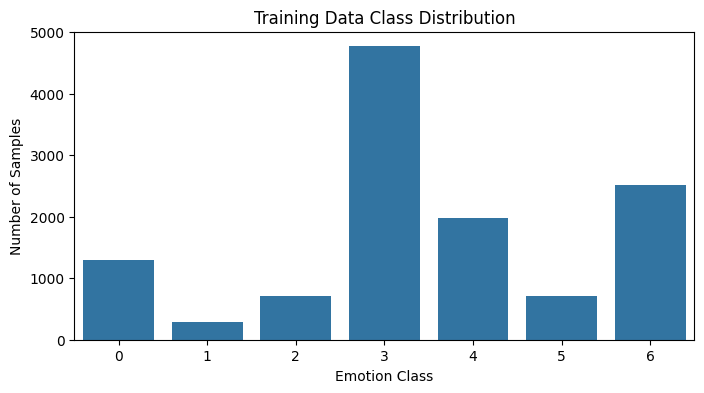

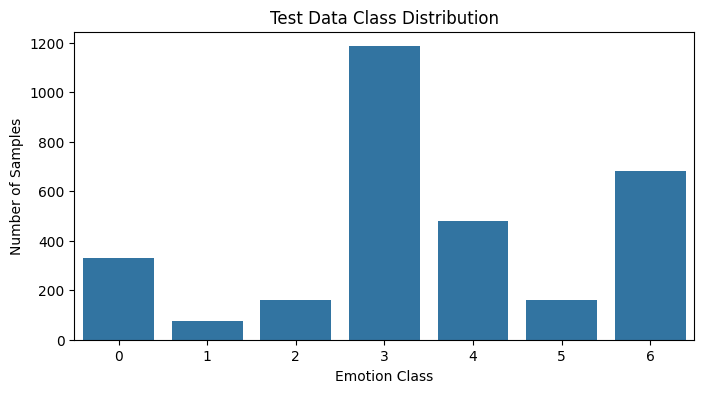

Training Data Class Distribution: Counter({3: 4772, 6: 2524, 4: 1982, 0: 1290, 2: 717, 5: 705, 1: 281})
Test Data Class Distribution: Counter({3: 1185, 6: 680, 4: 478, 0: 329, 5: 162, 2: 160, 1: 74})


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Count the number of occurrences of each label in y_train and y_test
train_class_distribution = Counter(y_train)
test_class_distribution = Counter(y_test)

# Plot the class distribution for training data
plt.figure(figsize=(8, 4))
sns.barplot(x=list(train_class_distribution.keys()), y=list(train_class_distribution.values()))
plt.title('Training Data Class Distribution')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.show()

# Plot the class distribution for test data
plt.figure(figsize=(8, 4))
sns.barplot(x=list(test_class_distribution.keys()), y=list(test_class_distribution.values()))
plt.title('Test Data Class Distribution')
plt.xlabel('Emotion Class')
plt.ylabel('Number of Samples')
plt.show()

# Print the distribution in numerical form
print("Training Data Class Distribution:", train_class_distribution)
print("Test Data Class Distribution:", test_class_distribution)